In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
import itertools
from itertools import combinations
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from collections import Counter
import nltk
from nltk.corpus import stopwords, words as nltk_words
from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
import matplotlib.cm as cm
import re
from nltk.stem import WordNetLemmatizer
import heapq
from tqdm import tqdm

# import pycountry
# from langdetect import detect
# from prettytable import PrettyTable



In [3]:

df = pd.read_csv('C:/Users/21301610/Downloads/code/combine/data_lstm_processed_unique_perhour_avg_values_combine_test.csv')
df.head()


,Unnamed: 0,Tweet Id,Tweet Posted Time,Tweet Content,Retweets Received,Likes Received,User Id,Username,Verified or Non-Verified,User Followers,User Following,Hour,Frequency,Tweet Type_encoded,Average Likes,Average Retweets
0,1,"""1570341208844808192""",2022-09-15 09:18:14,"""businesses that accept #bitcoin can undercut ...",0,0.0,"""1000157817528049664""",kenobi_d,0,954,3872,0.0,1,0,0.0,0.0
1,2,"""1570467945327001601""",2022-09-15 17:41:50,"""#bitcoin is the end of counterfeiting.""",0,0.0,"""1000157817528049664""",kenobi_d,0,953,3877,8.0,2,0,0.0,0.0
2,3,"""1570750327787524098""",2022-09-16 12:23:55,"""#bitcoin rabbit hole""",0,1.0,"""1000157817528049664""",kenobi_d,0,953,3879,27.0,1,2,1.0,0.0
3,4,"""1570603685201457153""",2022-09-16 02:41:13,"""$54.94 to uber downtown and back only to find...",0,1.0,"""1000501176411000832""",Schmieglese,0,1406,813,17.0,1,2,1.0,0.0
4,5,"""1570768653045633024""",2022-09-16 13:36:45,"""c'mon #bitcoin we're waiting 😅",0,0.0,"""1001913907391401989""",mynameisraul__,0,33,234,28.0,1,0,0.0,0.0


In [4]:
df.shape

(15167, 16)

In [5]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate the mean of the 'Frequency' column
average_frequency = df['Frequency'].mean()

# Print the average frequency
print("Average Frequency:", average_frequency)


Average Frequency: 1.7213028285092635


In [6]:
import pandas as pd

# Assuming df is your DataFrame
# Sort the DataFrame by the 'Frequency' column in descending order
top_frequencies = df.sort_values(by='Frequency', ascending=False).head(30)

# Print the top 30 frequencies
print("Top 30 frequencies:")
print(top_frequencies[['Frequency']])


Top 30 frequencies:
       Frequency
14016         96
8171          79
8168          67
9900          60
9870          60
9897          60
9888          60
9881          60
9893          60
9885          60
9878          60
9875          60
9872          59
9891          59
9892          59
9886          59
9890          59
9889          59
9894          59
9869          59
9895          59
9868          59
9871          59
9867          59
9866          59
9876          59
9896          59
9874          59
9873          59
9880          59


In [7]:
df.shape

(15167, 16)

In [8]:
# df = pd.read_csv('/content/drive/MyDrive/A. Shihab work station/Thesis(Shihab, Raiyan)/Thesis data/data_lstm_processed_unique_perhour_avg_values.csv')
# df.head()

In [9]:
columns_to_keep = [#'Tweet Type_encoded',
                   'Retweets Received', 'Likes Received',
        'User  Id', 'Hour', 'Frequency', 'Verified or Non-Verified',  'User Followers',
       'User Following', 'Average Likes', 'Average Retweets']

df = df[columns_to_keep]
df.head()

,Retweets Received,Likes Received,User Id,Hour,Frequency,Verified or Non-Verified,User Followers,User Following,Average Likes,Average Retweets
0,0,0.0,"""1000157817528049664""",0.0,1,0,954,3872,0.0,0.0
1,0,0.0,"""1000157817528049664""",8.0,2,0,953,3877,0.0,0.0
2,0,1.0,"""1000157817528049664""",27.0,1,0,953,3879,1.0,0.0
3,0,1.0,"""1000501176411000832""",17.0,1,0,1406,813,1.0,0.0
4,0,0.0,"""1001913907391401989""",28.0,1,0,33,234,0.0,0.0


In [10]:
# prompt: printing total unique values of hour sorted

print(sorted(df['Hour'].unique()))


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0]


In [11]:
# # # prompt: take a random shuffled subset of the df of like 10%

# df = df.sample(frac=0.01, random_state=42)
# df.head()


In [12]:
df.shape

(15167, 10)

In [13]:
# prompt: I want to process this for LSTM. so creating a vector, inside that for each user there will be a separate vector- inside which for each hour there will be 38 vectors for 38 hours of data. inside each hour vector there will be the data of Tweet Type_encoded	Retweets Received	Likes Received  Frequency	Verified or Non-Verified	User Followers	User Following. shape like [[[],[]..],[[],[]...]..]

def create_user_vector(df):
  user_vector = []
  for user_id in df['User  Id'].unique():
    user_df = df[df['User  Id'] == user_id]
    hour_vector = []
    for hour in range(39):
      hour_df = user_df[user_df['Hour'] == hour]
      if not hour_df.empty:
        features = hour_df[['Retweets Received', 'Likes Received', 'Verified or Non-Verified', 'User Followers', 'User Following','Average Likes', 'Average Retweets','Frequency']].values.tolist()[0]
        hour_vector.append(features)
      else:
        hour_vector.append([0] * 8)  # Pad with zeros if no data for that hour
    user_vector.append(hour_vector)
  return user_vector

lstm_data = create_user_vector(df)


In [14]:
# prompt: printing some of lstm_data in a way to help me visualize it's structure properly.  also printing its dimensions.

# Print the shape of the lstm_data
print("Shape of lstm_data:", np.array(lstm_data).shape)

# Print the first user's data for the first 5 hours
print("\nFirst user's data for the first 5 hours:")
for i in range(39):
  print(f"Hour {i}: {lstm_data[0][i]}")

# Print the first 5 users' data for the first hour
print("\nFirst 5 users' data for the first hour:")
for i in range(5):
  print(f"User {i}: {lstm_data[i][0]}")


Shape of lstm_data: (9550, 39, 8)

First user's data for the first 5 hours:
Hour 0: [0.0, 0.0, 0.0, 954.0, 3872.0, 0.0, 0.0, 1.0]
Hour 1: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 2: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 3: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 4: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 5: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 6: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 7: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 8: [0.0, 0.0, 0.0, 953.0, 3877.0, 0.0, 0.0, 2.0]
Hour 9: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 10: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 11: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 12: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 13: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 14: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 15: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 16: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 17: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 18: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 19: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 20: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 21: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 22: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 23: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 24: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 25: [0, 0, 0, 0, 0, 0, 0, 0]
Hour 26:

In [15]:
# prompt: total number of unique user  ids in df

len(df['User  Id'].unique())


9550

In [16]:
# # prompt:  imputing for the data in lstm_data to make sure the hours data which has no data because there is no user  id, those are not filled wth zeros only.

# def impute_missing_data(lstm_data):
#   for user_data in lstm_data:
#     for hour in range(39):
#       if user_data[hour] == [0] * 8:
#         # Impute with the average of the previous and next hour's data
#         prev_hour = (hour - 1) % 39
#         next_hour = (hour + 1) % 39
#         if user_data[prev_hour] != [0] * 8 or user_data[next_hour] != [0] * 8:
#           imputed_data = [(a + b) / 2 for a, b in zip(user_data[prev_hour], user_data[next_hour])]
#           user_data[hour] = imputed_data
#   return lstm_data

# lstm_data = impute_missing_data(lstm_data)


In [17]:
# # prompt: similar to last imputing moving forward. do a backward check to impute the earlier values.

# def impute_missing_data_backward(lstm_data):
#   for user_data in lstm_data:
#     for hour in range(38, -1, -1):  # Iterate backwards
#       if user_data[hour] == [0] * 8:
#         # Impute with the average of the previous and next hour's data
#         prev_hour = (hour - 1) % 39
#         next_hour = (hour + 1) % 39
#         if user_data[prev_hour] != [0] * 8 or user_data[next_hour] != [0] * 8:
#           imputed_data = [(a + b) / 2 for a, b in zip(user_data[prev_hour], user_data[next_hour])]
#           user_data[hour] = imputed_data
#   return lstm_data

# lstm_data = impute_missing_data_backward(lstm_data)


In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming lstm_data is your original data

# Convert lstm_data to a numpy array
lstm_data_array = np.array(lstm_data)
print("Original lstm_data_array shape:", lstm_data_array.shape)

# Separate the last column from the rest of the data
X = lstm_data_array[:, :, :-1]  # All columns except the last one
last_column = lstm_data_array[:, :, -1]  # Last column only
print("Shape of X (all columns except last):", X.shape)
print("Shape of last_column (last column only):", last_column.shape)

# Reshape for scaling
X_reshaped = X.reshape(-1, X.shape[-1])
last_column_reshaped = last_column.reshape(-1, 1)
print("Shape of X_reshaped for scaling:", X_reshaped.shape)
print("Shape of last_column_reshaped for scaling:", last_column_reshaped.shape)

# Create StandardScaler objects for different scaling
scaler_X = StandardScaler()
scaler_last = StandardScaler()

# Fit and transform the data
X_scaled = scaler_X.fit_transform(X_reshaped)
last_column_scaled = scaler_last.fit_transform(last_column_reshaped)
print("Shape of X_scaled after transformation:", X_scaled.shape)
print("Shape of last_column_scaled after transformation:", last_column_scaled.shape)

# Reshape back to the original shape
X_scaled = X_scaled.reshape(lstm_data_array.shape[0], lstm_data_array.shape[1], -1)
last_column_scaled = last_column_scaled.reshape(lstm_data_array.shape[0], lstm_data_array.shape[1], 1)

print("Shape of X_scaled after reshaping:", X_scaled.shape)
print("Shape of last_column_scaled after reshaping:", last_column_scaled.shape)

# Concatenate the scaled data
lstm_data_normalized = np.concatenate((X_scaled, last_column_scaled), axis=-1)
print("Shape of lstm_data_normalized after concatenation:", lstm_data_normalized.shape)


Original lstm_data_array shape: (9550, 39, 8)
Shape of X (all columns except last): (9550, 39, 7)
Shape of last_column (last column only): (9550, 39)
Shape of X_reshaped for scaling: (372450, 7)
Shape of last_column_reshaped for scaling: (372450, 1)
Shape of X_scaled after transformation: (372450, 7)
Shape of last_column_scaled after transformation: (372450, 1)
Shape of X_scaled after reshaping: (9550, 39, 7)
Shape of last_column_scaled after reshaping: (9550, 39, 1)
Shape of lstm_data_normalized after concatenation: (9550, 39, 8)


In [19]:
# # prompt: print some of lstm_data in a way to help me visualize it's structure properly.  also print its dimensions.

# # Print the shape of the lstm_data
# print("Shape of lstm_data:", np.array(lstm_data_normalized).shape)

# # Print the first user's data for the first 5 hours
# print("\nFirst user's data for the first 5 hours:")
# for i in range(39):
#   print(f"Hour {i}: {lstm_data_normalized[0][i]}")

# # Print the first 5 users' data for the first hour
# print("\nFirst 5 users' data for the first hour:")
# for i in range(5):
#   print(f"User {i}: {lstm_data_normalized[i][0]}")


In [20]:

test_data = lstm_data_normalized

In [21]:
# prompt: so the shape is (1059, 39, 7) for train_data. from this, create train_x so that the shape is (1059,37,7). hence for each instance take only the first 37 in x and create train_y where for each user the last 2 will be there with shape (1059,2,7)


test_x = test_data[:, :38, :]
test_y = test_data[:, 38:, :]

print("Test x shape:", test_x.shape)
print("Test y shape:", test_y.shape)



Test x shape: (9550, 38, 8)
Test y shape: (9550, 1, 8)


In [22]:
# prompt: in trainy test y and valy, remove values of the last dimension and make it 1 by keeping only the last entry. So the shape of train y becomes (1059,1,1) where out of the 6 values in the last dimension only the last value will be present.


test_y = test_y[:, :, -1].reshape(test_y.shape[0], 1, 1)

print("Test x shape:", test_x.shape)
print("Test y shape:", test_y.shape)



Test x shape: (9550, 38, 8)
Test y shape: (9550, 1, 1)


In [23]:
# # Group by "User  Id" and take the maximum of the "Frequency" column for each user
# unique_users_frequency = df.groupby('User  Id')['Frequency'].max().reset_index()

# # Assuming test_y is the extracted last column from lstm_data_normalized (scaled frequency for 39th hour)
# # Reshape test_y for inverse scaling
# scaled_frequency_reshaped = test_y.reshape(-1, 1)

# # Create dummy data for inverse transform (we only need the frequency column)
# dummy_data = np.zeros((scaled_frequency_reshaped.shape[0], lstm_data_normalized.shape[-1]))  # Create dummy data
# dummy_data[:, -1] = scaled_frequency_reshaped[:, 0]  # Place scaled frequency into the last column

# # Inverse transform to recover the original frequency
# original_frequency_scaled_back = scaler_last.inverse_transform(dummy_data)[:, -1]  # Extract only the last column

# # Plot the max frequency of unique users vs inverse scaled frequency
# plt.figure(figsize=(10,6))

# # Plot unique users' max frequency
# plt.plot(range(len(unique_users_frequency)), unique_users_frequency['Frequency'], marker='o', linestyle='--', color='r', label='Max Frequency (Unique Users)')

# # Plot the inverse scaled frequency
# plt.plot(range(len(original_frequency_scaled_back)), original_frequency_scaled_back, marker='x', linestyle='-', color='b', label='Inverse Scaled Frequency')

# # Adding title and labels
# plt.title('Max Frequency (Unique Users) vs Inverse Scaled Frequency')
# plt.xlabel('Unique User Count')
# plt.ylabel('Frequency')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()

In [24]:
# prompt: print only the maximum 10 values of test y.

# Find the maximum 10 values in test_y_actual
# max_values = heapq.nlargest(10, test_y.flatten())
# print("Maximum 10 values of test_y_actual:", max_values)


In [25]:
# import pickle

# # Export predictions_2 to a file
# with open('test_y_lstm.pkl', 'wb') as f:
#     pickle.dump(test_y_actual, f)


In [26]:
#___

In [27]:
#___

In [28]:
import numpy as np
import pandas as pd
# import torch
# from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [29]:
df_concatenated = pd.read_csv("C:\\Users\\21301610\\Downloads\\combine\\defense_final\\Aggregate\\aggregate_test.csv")
df_concatenated.rename(columns={'Aggregated Vector': 'bert_embedding'}, inplace=True)

# df_concatenated = pd.read_csv("C:\\Users\\21301610\\Downloads\\combine\\defense_final\\PCA\\pca_train.csv")
# df_concatenated.rename(columns={'PCA Reduced Vector': 'bert_embedding'}, inplace=True)

# df_concatenated = pd.read_csv("C:\\Users\\21301610\\Downloads\\combine\\defense_final\\Mean_pool\\mean_pool_train.csv")
# df_concatenated.rename(columns={'Pooled Vector': 'bert_embedding'}, inplace=True)

# df_concatenated = pd.read_csv("C:\\Users\\21301610\\Downloads\\combine\\defense_final\\Max_pool\\max_pool_train.csv")
# df_concatenated.rename(columns={'Pooled Vector': 'bert_embedding'}, inplace=True)

# df_concatenated = pd.read_csv("C:\\Users\\21301610\\Downloads\\combine\\defense_final\\Concat\\concat_train.csv")

def string_to_array(string_embedding):
    # Convert the string representation of a numpy array back to a numpy array
    return np.fromstring(string_embedding.strip('[]'), sep=' ', dtype=np.float32)

# Apply the conversion to your embeddings
df_concatenated['bert_embedding'] = df_concatenated['bert_embedding'].apply(string_to_array)

# Verify the conversion
print(df_concatenated['bert_embedding'].apply(type).unique())



[<class 'numpy.ndarray'>]


In [30]:
df_concatenated.head()

,User Id,Hour,bert_embedding,Tweet Posted Time,Tweet Content,Frequency,Likes Received
0,"""1000157817528049664""",0.0,"[-0.036657587, 0.18017164, 0.05914678, 0.13863...",2022-09-15 09:18:14,"""businesses that accept #bitcoin can undercut ...",1,0.0
1,"""1000157817528049664""",8.0,"[0.844336, 0.31393492, 0.11502318, 0.77762234,...",2022-09-15 17:30:42,"""our own reality is created by our thoughts, t...",2,0.0
2,"""1000157817528049664""",27.0,"[0.014070917, -0.039463937, 0.12622456, 0.1758...",2022-09-16 12:23:55,"""#bitcoin rabbit hole""",1,1.0
3,"""1000501176411000832""",17.0,"[0.090164915, -0.063742615, 0.55363154, 0.1553...",2022-09-16 02:41:13,"""$54.94 to uber downtown and back only to find...",1,1.0
4,"""1001913907391401989""",28.0,"[0.19764242, 0.28220564, 0.5862857, -0.1821781...",2022-09-16 13:36:45,"""c'mon #bitcoin we're waiting 😅",1,0.0


In [31]:
df_concatenated.shape

(15167, 7)

In [32]:

# Verify hours for sanity check
min_hour = df_concatenated['Hour'].min()
max_hour = df_concatenated['Hour'].max()
print("Hour:", min_hour, "-", max_hour)



Hour: 0.0 - 38.0


In [33]:
# Define a function to scale embeddings without scaling frequency
def scale_embeddings_only(row, embedding_scaler):
    embedding = row['bert_embedding']
    # Scale the embedding
    scaled_embedding = embedding_scaler.transform([embedding])[0]
    frequency = row['Frequency']  # Keep the original frequency
    # Convert frequency to an array and concatenate
    return np.append(scaled_embedding, frequency)  # Append the original frequency

# Prepare to collect embeddings for scaling
embedding_list = np.array(df_concatenated['bert_embedding'].tolist())

# Fit the scaler on all embeddings
embedding_scaler = StandardScaler()  # or MinMaxScaler(feature_range=(0, 1))
embedding_scaler.fit(embedding_list)

# Apply scaling and appending frequency without scaling it
df_concatenated['bert_embedding_with_frequency'] = df_concatenated.apply(
    scale_embeddings_only, axis=1, embedding_scaler=embedding_scaler
)

In [34]:
df_concatenated.head()

,User Id,Hour,bert_embedding,Tweet Posted Time,Tweet Content,Frequency,Likes Received,bert_embedding_with_frequency
0,"""1000157817528049664""",0.0,"[-0.036657587, 0.18017164, 0.05914678, 0.13863...",2022-09-15 09:18:14,"""businesses that accept #bitcoin can undercut ...",1,0.0,"[-0.32755069573896134, 0.35811430336854133, -0..."
1,"""1000157817528049664""",8.0,"[0.844336, 0.31393492, 0.11502318, 0.77762234,...",2022-09-15 17:30:42,"""our own reality is created by our thoughts, t...",2,0.0,"[0.8497045590851992, 0.5617284825617904, -0.14..."
2,"""1000157817528049664""",27.0,"[0.014070917, -0.039463937, 0.12622456, 0.1758...",2022-09-16 12:23:55,"""#bitcoin rabbit hole""",1,1.0,"[-0.2597631429529057, 0.02378550727685645, -0...."
3,"""1000501176411000832""",17.0,"[0.090164915, -0.063742615, 0.55363154, 0.1553...",2022-09-16 02:41:13,"""$54.94 to uber downtown and back only to find...",1,1.0,"[-0.15808015359884572, -0.01317144356824892, 0..."
4,"""1001913907391401989""",28.0,"[0.19764242, 0.28220564, 0.5862857, -0.1821781...",2022-09-16 13:36:45,"""c'mon #bitcoin we're waiting 😅",1,0.0,"[-0.014459974497022245, 0.5134302401133887, 0...."


In [35]:
# Create a mapping for User Ids
user_id_mapping = {user_id: idx for idx, user_id in enumerate(df_concatenated['User Id'].unique())}
num_users = len(user_id_mapping)
num_hours = 39  # Assuming you have 39 hours(0 to 38)
embedding_size = len(df_concatenated['bert_embedding_with_frequency'].iloc[0])

# Ensure correct data types
df_concatenated['User Id'] = df_concatenated['User Id'].astype(str)
df_concatenated['Hour'] = df_concatenated['Hour'].astype(int)

# Initialize 3D numpy array
lstm_input = np.zeros((num_users, num_hours, embedding_size))

# Populate the 3D array
for _, row in df_concatenated.iterrows():
    user_id = row['User Id']
    hour = row['Hour']  # Use the hour directly since it's already 0-based
    embedding = row['bert_embedding_with_frequency']
    
    # Get the user index
    user_index = user_id_mapping[user_id]
    
    # Assign embedding to the 3D array
    lstm_input[user_index, hour, :] = embedding

# Print the shape of the resulting array
print(lstm_input.shape)

# Print the data for the first user
first_user_index = 0  # Adjust if needed
print(f"Data for the first user (index {first_user_index}):")
print(lstm_input[first_user_index])


(9550, 39, 769)
Data for the first user (index 0):
[[-0.3275507   0.3581143  -0.19476687 ... -0.2656869  -0.14344616
   1.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [36]:
# Create train_x and train_y
test_x1 = lstm_input[:, :38, :-1]
test_y1 = lstm_input[:, 38, -1]


check_test_y1 = test_y1.copy()
print(check_test_y1.shape)
# Check if the arrays are equal
are_arrays_equal = np.array_equal(check_test_y1, test_y1)
print("\nAre the arrays equal? (check_test_y == test_y):", are_arrays_equal)




(9550,)

Are the arrays equal? (check_test_y == test_y): True


In [37]:


# Extract the 39th hour frequencies
last_hour_frequencies = lstm_input[:, 38, -1].reshape(-1, 1)  # Assuming last column is frequency

# Fit the scaler on the 39th hour frequencies
frequency_scaler = StandardScaler()  # or MinMaxScaler(feature_range=(0, 1))
frequency_scaler.fit(last_hour_frequencies)

# Transform the 39th hour frequencies
scaled_frequencies = frequency_scaler.transform(last_hour_frequencies)

# Replace the 39th hour frequencies in lstm_input with the scaled values
for i in range(len(lstm_input)):
    lstm_input[i, 38, -1] = scaled_frequencies[i, 0]



# Create train_x and train_y
test_x1 = lstm_input[:, :38, :-1]
test_y1 = lstm_input[:, 38, -1]


print("Test x 1 shape:", test_x1.shape)
print("Test y 1 shape:", test_y1.shape)




# Check if the arrays are equal
are_arrays_equal = np.array_equal(check_test_y1, test_y1)
print("\nAre the arrays equal? (check_test_y == test_y):", are_arrays_equal)




Test x 1 shape: (9550, 38, 768)
Test y 1 shape: (9550,)

Are the arrays equal? (check_test_y == test_y): False


In [38]:
from tensorflow.keras.models import load_model

# Load the saved model
model_shihab = load_model('C:/Users/21301610/Downloads/combine/lstm_model_multivarient_base_16.keras')
# model_shihab = load_model('C:/Users/21301610/Downloads/combine/lstm_model_multivarient.h5')

In [39]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# #model_raiyan = load_model('C:/Users/21301610/Downloads/combine/raiyan/raiyan_model.h5')

# #model_raiyan =tf.saved_model.load('C:/Users/21301610/Downloads/combine/raiyan/raiyan_model/')

In [40]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model_raiyan = load_model('C:\\Users\\21301610\\Downloads\\combine\\defense_final\\Aggregate\\raiyan_aggregate128lstm_model.keras')

C:\Users\21301610\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
predictions_1 = model_shihab.predict(test_x)

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
predictions_1.shape

(9550, 1)

In [43]:
predictions_2 = model_raiyan.predict(test_x1)

299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [44]:
# import pickle

# # Import predictions_1 from the file
# with open('predictions_2.pkl', 'rb') as f:
#     predictions_2 = pickle.load(f)

In [45]:
# import pickle

# # Export predictions_2 to a file
# with open('predictions_2_pool.pkl', 'wb') as f:
#     pickle.dump(predictions_2, f)


In [46]:
#predictions_2 = model_raiyan.predict(test_x1)

In [47]:
predictions_2.shape

(9550, 1)

In [48]:
is_y_equal = np.array_equal(test_y, test_y1)
print(is_y_equal)

print(test_y.shape)
print(test_y==test_y1)

False
(9550, 1, 1)
[[[False False False ... False False False]]

 [[False False False ... False False False]]

 [[False False False ... False False False]]

 ...

 [[False False False ... False False False]]

 [[False False False ... False False False]]

 [[False False False ... False False False]]]


In [49]:
# prompt: find mse rmse and all other stuff to find the models accuracy

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure both arrays are 2D for compatibility with sklearn metrics
# If your target variable is a single value per sample, you likely want to reshape to (n_samples, 1)
test_y = test_y.reshape(test_y.shape[0], -1)
predictions_1 = predictions_1.reshape(predictions_1.shape[0], -1)

# Calculate the mean of test_y
mean_test_y = np.mean(test_y)

# Calculate the range (max - min) of test_y
range_test_y = np.ptp(test_y)

# Print the results
print(f"Mean of test_y: {mean_test_y}")
print(f"Range of test_y (max - min): {range_test_y}")

# Calculate MSE
mse = mean_squared_error(test_y, predictions_1)

# Calculate RMSE
rmse = mean_squared_error(test_y, predictions_1, squared=False)

# Calculate MAE
mae = mean_absolute_error(test_y, predictions_1)

# Calculate R-squared
r2 = r2_score(test_y, predictions_1)

# Print the results
print(f"MSE SHIHAB: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Mean of test_y: -0.029050320112175204
Range of test_y (max - min): 58.546219535956546
MSE SHIHAB: 0.49347426293972557
RMSE: 0.702477233040136
MAE: 0.09991769344165097
R-squared: 0.35704742894959796


In [50]:
# Inverse transform the predictions to get the actual values
predictions_actual = scaler_last.inverse_transform(predictions_1.reshape(-1, 1))

predictions_actual = predictions_actual.reshape(predictions_1.shape[0], 1)

# Inverse transform the test_y to get the actual values
test_y_actual = scaler_last.inverse_transform(test_y.reshape(-1, 1))
# print test_y_actual
print(test_y_actual)
test_y_actual = test_y_actual.reshape(test_y.shape[0], 1)



# Calculate the mean of test_y_actual
mean_test_y_actual = np.mean(test_y_actual)

# Calculate the range (max - min) of test_y_actual
range_test_y_actual = np.ptp(test_y_actual)

# Print the results
print(f"Mean of test_y_actual: {mean_test_y_actual}")
print(f"Range of test_y_actual (max - min): {range_test_y_actual}")

# Calculate MSE
mse = mean_squared_error(test_y_actual, predictions_actual)

# Calculate RMSE
rmse = mean_squared_error(test_y_actual, predictions_actual, squared=False)

# Calculate MAE
mae = mean_absolute_error(test_y_actual, predictions_actual)

# Calculate R-squared
r2 = r2_score(test_y_actual, predictions_actual)

# Print the results
print(f"MSE SHIHAB: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Mean of test_y_actual: 0.04429319371727749
Range of test_y_actual (max - min): 52.0
MSE SHIHAB: 0.38929021176270573
RMSE: 0.6239312556385564
MAE: 0.08874561196846488
R-squared: 0.35704742367370024


The arrays are equal within the specified tolerance.


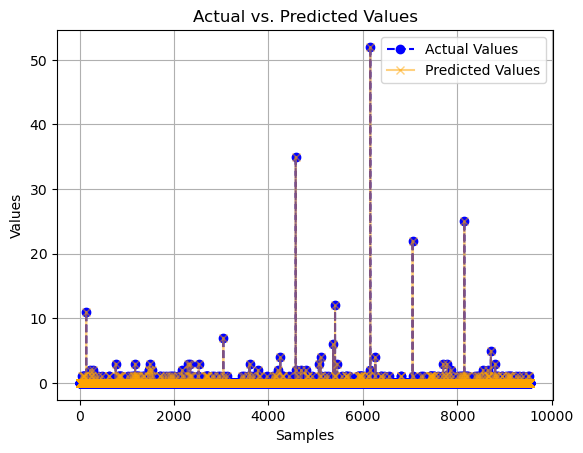

In [51]:

# Reshape predictions and test_y
predictions_2 = predictions_2.reshape(-1, 1)
test_y1 = test_y1.reshape(-1, 1)

# Invert the scaling to get the actual values for frequency
predictions_2_actual = frequency_scaler.inverse_transform(predictions_2)
test_y1_actual = frequency_scaler.inverse_transform(test_y1)

    
# If your data is in 2D (like shape (n_samples, 1)), flatten it to 1D
test_y1_actual = test_y1_actual.flatten()
check_test_y1 = check_test_y1.flatten()



#IMPORTANT
#am using isclose instead of == because of floating point error where 0.9999999999!=1
# Check if the arrays are close to each other
are_equal = np.all(np.isclose(check_test_y1, test_y1_actual))

# Print the result
if are_equal:
    print("The arrays are equal within the specified tolerance.")
else:
    print("The arrays are NOT equal within the specified tolerance.")
    

# Plotting
plt.plot(test_y1_actual, label='Actual Values', color='blue', marker='o', linestyle='--')
plt.plot(check_test_y1, label='Predicted Values', color='orange', marker='x', linestyle='-', alpha= 0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()




In [52]:
# Calculate the mean of test_y
mean_test_y1 = np.mean(test_y1_actual)

# Calculate the range (max - min) of test_y
range_test_y1 = np.ptp(test_y1_actual)

# Print the results
print(f"Mean of test_y: {mean_test_y1}")
print(f"Range of test_y (max - min): {range_test_y1}")

# Calculate metrics
mse = mean_squared_error(test_y1_actual, predictions_2_actual)
rmse = mean_squared_error(test_y1_actual, predictions_2_actual, squared=False)
mae = mean_absolute_error(test_y1_actual, predictions_2_actual)
r2 = r2_score(test_y1_actual, predictions_2_actual)

# Print the results
print(f"MSE RAIYAN: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

Mean of test_y: 0.04429319371727749
Range of test_y (max - min): 52.0
MSE RAIYAN: 0.3255653313294723
RMSE: 0.5705833254919673
MAE: 0.0755386557969934
R-squared: 0.462295577397143


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


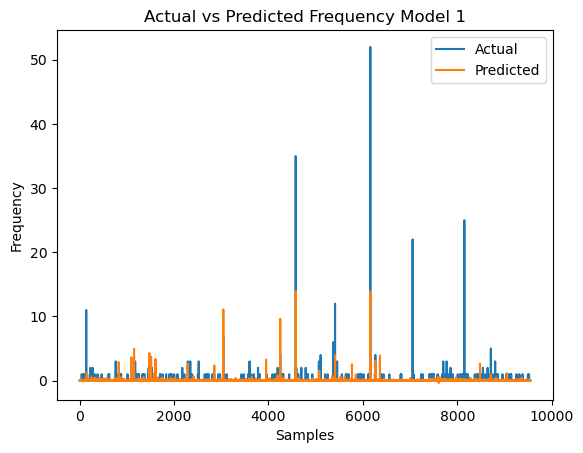

In [53]:
# prompt:  predict and test, after that show a actual vs prediction plot for the frequency column that is in the test_y for last hour. However it needs to be taken care properly that the values were scaled using standard scaler for which getting back the actual value from the predictions_1 can be tricky. so atleast try so that the values of test_y and predictions_1 are in the same form


# Inverse transform the predictions to get the actual values
predictions_actual = scaler_last.inverse_transform(predictions_1.reshape(-1, 1))

predictions_actual = predictions_actual.reshape(predictions_1.shape[0], 1)

# Inverse transform the test_y to get the actual values
test_y_actual = scaler_last.inverse_transform(test_y.reshape(-1, 1))
# print test_y_actual
print(test_y_actual)
test_y_actual = test_y_actual.reshape(test_y.shape[0], 1)




# Plot the actual vs predicted values
plt.plot(test_y_actual, label='Actual')
plt.plot(predictions_actual, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Frequency Model 1')
plt.legend()
plt.show()




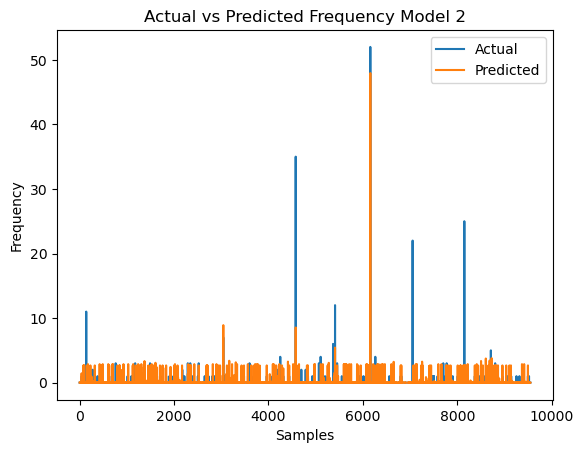

In [54]:
# Raiyan Plot


# Plot actual vs. predicted with axis labels
plt.plot(test_y1_actual, label='Actual')
plt.plot(predictions_2_actual, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Frequency Model 2')
plt.legend()
plt.show()





In [55]:
predictions_1.shape


(9550, 1)

In [56]:
predictions_2.shape

(9550, 1)

In [57]:
# prompt: now i want to make a regression model where predictions_1 and predictions_2 will be my two features and test_y will be my target variable. Now firstly, properly prepare train test val data for my model.

from sklearn.model_selection import train_test_split

# Combine predictions_1 and predictions_2 into a single feature matrix
X = np.column_stack((predictions_1, predictions_2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, test_y, test_size=0.3, random_state=42
)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)  # 0.25 x 0.8 = 0.2


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6016, 2)
y_train shape: (6016, 1)
X_val shape: (669, 2)
y_val shape: (669, 1)
X_test shape: (2865, 2)
y_test shape: (2865, 1)


C:\Users\21301610\AppData\Local\Temp\ipykernel_12296\2076186147.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Fusion Ensemble with Random Forest Regressor
Validation Set Evaluation:
MSE: 1.0715215178328457
RMSE: 1.0351432354185799
MAE: 0.060776332400567776
R-squared: 0.4160614145862064

Test Set Evaluation:
MSE: 0.24958698197694834
RMSE: 0.4995868112520069
MAE: 0.04870655091001755
R-squared: 0.10088806486171176


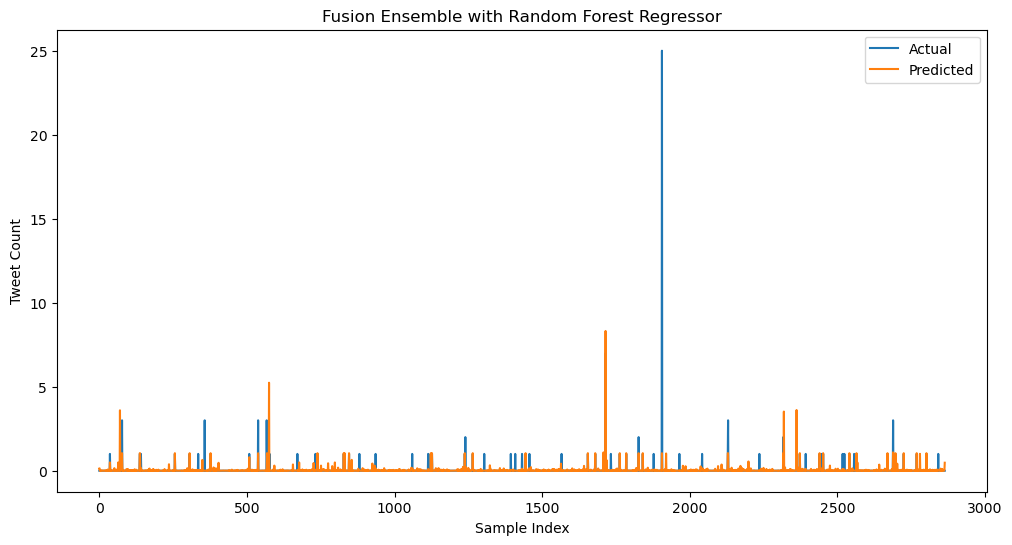

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the regression model
model = RandomForestRegressor(
    n_estimators=500,         # Increase the number of trees
    max_depth=15,             # Limit the depth of each tree
    min_samples_split=10,     # Require more samples to split an internal node
    min_samples_leaf=5,       # Require a higher number of samples per leaf
    max_features='sqrt',      # Use a subset of features at each split to reduce overfitting
    random_state=42           # Ensures reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Inverse transform the predictions and actual values for the validation set
y_val_pred_actual = scaler_last.inverse_transform(y_val_pred.reshape(-1, 1)).reshape(-1)
y_val_actual = scaler_last.inverse_transform(y_val.reshape(-1, 1)).reshape(-1)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val_actual, y_val_pred_actual)
rmse_val = mean_squared_error(y_val_actual, y_val_pred_actual, squared=False)
mae_val = mean_absolute_error(y_val_actual, y_val_pred_actual)
r2_val = r2_score(y_val_actual, y_val_pred_actual)

print("Fusion Ensemble with Random Forest Regressor")
print("Validation Set Evaluation:")
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R-squared: {r2_val}")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values for the test set
y_test_pred_actual = scaler_last.inverse_transform(y_test_pred.reshape(-1, 1)).reshape(-1)
y_test_actual = scaler_last.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test_actual, y_test_pred_actual)
rmse_test = mean_squared_error(y_test_actual, y_test_pred_actual, squared=False)
mae_test = mean_absolute_error(y_test_actual, y_test_pred_actual)
r2_test = r2_score(y_test_actual, y_test_pred_actual)

print("\nTest Set Evaluation:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R-squared: {r2_test}")

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_pred_actual, label='Predicted')
plt.title('Fusion Ensemble with Random Forest Regressor')
plt.xlabel('Sample Index')
plt.ylabel('Tweet Count')
plt.legend()
plt.show()


In [59]:

min_value = np.min(y_test_actual)
max_value = np.max(y_test_actual)
mean_value = np.mean(y_test_actual)
min_value, max_value,mean_value

(0.0, 25.0, 0.04048865619546248)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor Validation Set Evaluation:
MSE: 0.08202427649488624
RMSE: 0.2863988067274133
MAE: 0.033399464265734806
R-squared: 0.9552998804140809

GradientBoostingRegressor Test Set Evaluation:
MSE: 0.24350899169815676
RMSE: 0.49346630249507084
MAE: 0.043129408782419616
R-squared: 0.12278341195886422


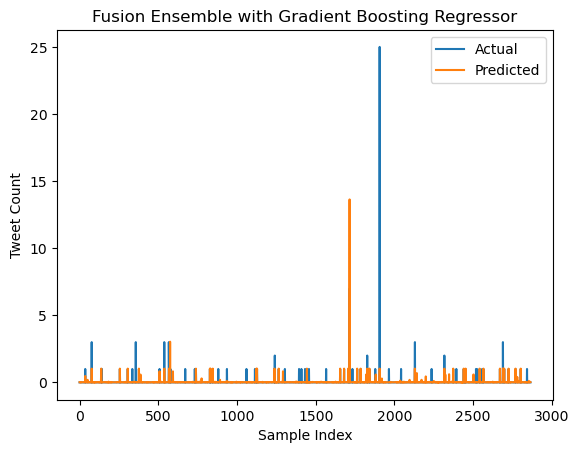

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Inverse transform the predictions and actual values for the validation set
y_val_pred_actual = scaler_last.inverse_transform(y_val_pred.reshape(-1, 1)).reshape(-1)
y_val_actual = scaler_last.inverse_transform(y_val.reshape(-1, 1)).reshape(-1)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val_actual, y_val_pred_actual)
rmse_val = mean_squared_error(y_val_actual, y_val_pred_actual, squared=False)
mae_val = mean_absolute_error(y_val_actual, y_val_pred_actual)
r2_val = r2_score(y_val_actual, y_val_pred_actual)

print("GradientBoostingRegressor Validation Set Evaluation:")
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R-squared: {r2_val}")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values for the test set
y_test_pred_actual = scaler_last.inverse_transform(y_test_pred.reshape(-1, 1)).reshape(-1)
y_test_actual = scaler_last.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test_actual, y_test_pred_actual)
rmse_test = mean_squared_error(y_test_actual, y_test_pred_actual, squared=False)
mae_test = mean_absolute_error(y_test_actual, y_test_pred_actual)
r2_test = r2_score(y_test_actual, y_test_pred_actual)

print("\nGradientBoostingRegressor Test Set Evaluation:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R-squared: {r2_test}")

# Plot the actual vs predicted values
# plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_pred_actual, label='Predicted')
plt.title('Fusion Ensemble with Gradient Boosting Regressor')
plt.xlabel('Sample Index')
plt.ylabel('Tweet Count')
plt.legend()
plt.show()


In [61]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


In [62]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable


Cat Boost Regressor Validation Set Evaluation:
MSE: 0.3338886414511572
RMSE: 0.5778309800029393
MAE: 0.046376813229046826
R-squared: 0.8180433544917975

Cat Boost Regressor Test Set Evaluation:
MSE: 0.2883155996359833
RMSE: 0.5369502766886178
MAE: 0.0496462572834573
R-squared: -0.038627875003540924


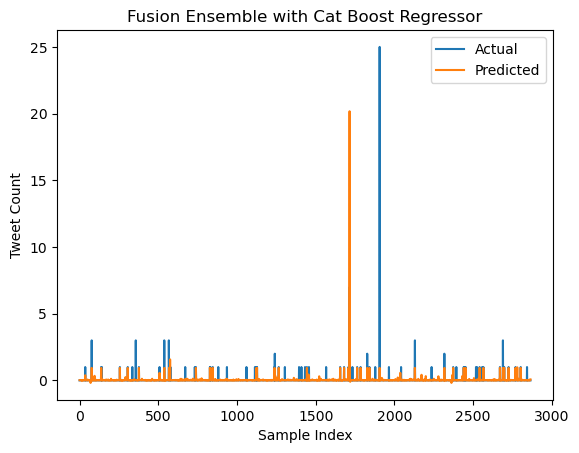

In [64]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize the regression model
model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Inverse transform the predictions and actual values for the validation set
y_val_pred_actual = scaler_last.inverse_transform(y_val_pred.reshape(-1, 1)).reshape(-1)
y_val_actual = scaler_last.inverse_transform(y_val.reshape(-1, 1)).reshape(-1)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val_actual, y_val_pred_actual)
rmse_val = mean_squared_error(y_val_actual, y_val_pred_actual, squared=False)
mae_val = mean_absolute_error(y_val_actual, y_val_pred_actual)
r2_val = r2_score(y_val_actual, y_val_pred_actual)

print("Cat Boost Regressor Validation Set Evaluation:")
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R-squared: {r2_val}")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Inverse transform the predictions and actual values for the test set
y_test_pred_actual = scaler_last.inverse_transform(y_test_pred.reshape(-1, 1)).reshape(-1)
y_test_actual = scaler_last.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test_actual, y_test_pred_actual)
rmse_test = mean_squared_error(y_test_actual, y_test_pred_actual, squared=False)
mae_test = mean_absolute_error(y_test_actual, y_test_pred_actual)
r2_test = r2_score(y_test_actual, y_test_pred_actual)

print("\nCat Boost Regressor Test Set Evaluation:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R-squared: {r2_test}")

# Plot the actual vs predicted values

plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_pred_actual, label='Predicted')
plt.title('Fusion Ensemble with Cat Boost Regressor')
plt.xlabel('Sample Index')
plt.ylabel('Tweet Count')
plt.legend()
plt.show()
